In [1]:
# impoting all needed packages/libraries for project
import pandas as pd
import numpy as np
import math
import warnings
warnings.filterwarnings("ignore")
import seaborn as sb
import matplotlib.pyplot as plt

We start by import some basic libraries:

-__Pandas__ for data control<br>
-**Sklearn** for the main model<br>
Today, we use __LinearRegression__ model to do the regression

In [2]:
#loading the dataset
fiat_data = pd.read_csv(r'C:\Users\admin\Desktop\Data\fiat500.csv')

In [3]:
#getting data
fiat_data.head()

,ID,model,engine_power,age_in_days,km,previous_owners,lat,lon,price
0,1,lounge,51,882,25000,1,44.907242,8.611560,8900
1,2,pop,51,1186,32500,1,45.666359,12.241890,8800
2,3,sport,74,4658,142228,1,45.503300,11.417840,4200
3,4,lounge,51,2739,160000,1,40.633171,17.634609,6000
4,5,pop,73,3074,106880,1,41.903221,12.495650,5700


In [4]:
fiat_data.shape

(1538, 9)

In [5]:
#Information of the fiat data
fiat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1538 entries, 0 to 1537
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               1538 non-null   int64  
 1   model            1538 non-null   object 
 2   engine_power     1538 non-null   int64  
 3   age_in_days      1538 non-null   int64  
 4   km               1538 non-null   int64  
 5   previous_owners  1538 non-null   int64  
 6   lat              1538 non-null   float64
 7   lon              1538 non-null   float64
 8   price            1538 non-null   int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 108.3+ KB


In [6]:
# Describing data
fiat_data.describe()

,ID,engine_power,age_in_days,km,previous_owners,lat,lon,price
count,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000
mean,769.500000,51.904421,1650.980494,53396.011704,1.123537,43.541361,11.563428,8576.003901
std,444.126671,3.988023,1289.522278,40046.830723,0.416423,2.133518,2.328190,1939.958641
min,1.000000,51.000000,366.000000,1232.000000,1.000000,36.855839,7.245400,2500.000000
25%,385.250000,51.000000,670.000000,20006.250000,1.000000,41.802990,9.505090,7122.500000
50%,769.500000,51.000000,1035.000000,39031.000000,1.000000,44.394096,11.869260,9000.000000
75%,1153.750000,51.000000,2616.000000,79667.750000,1.000000,45.467960,12.769040,10000.000000
max,1538.000000,77.000000,4658.000000,235000.000000,4.000000,46.795612,18.365520,11100.000000


In [7]:
#Checking is there any null values ae there or not
fiat_data.isna().sum()

ID                 0
model              0
engine_power       0
age_in_days        0
km                 0
previous_owners    0
lat                0
lon                0
price              0
dtype: int64

In [8]:
#checking unique values in column "model"
fiat_data['model'].unique()

array(['lounge', 'pop', 'sport'], dtype=object)

In [9]:
#checking count of each unique value in column "model"
fiat_data.groupby(['model']).count()

,ID,engine_power,age_in_days,km,previous_owners,lat,lon,price
model,,,,,,,,
lounge,1094,1094,1094,1094,1094,1094,1094,1094
pop,358,358,358,358,358,358,358,358
sport,86,86,86,86,86,86,86,86


In [10]:
#checking unique values in column "previous_owners"
fiat_data['previous_owners'].unique()

array([1, 2, 3, 4], dtype=int64)

In [11]:
#checking count of each unique value in column "previous_owners"
fiat_data.groupby(['previous_owners']).count()

,ID,model,engine_power,age_in_days,km,lat,lon,price
previous_owners,,,,,,,,
1,1389,1389,1389,1389,1389,1389,1389,1389
2,117,117,117,117,117,117,117,117
3,23,23,23,23,23,23,23,23
4,9,9,9,9,9,9,9,9


In [12]:
fiat_data['engine_power'].unique()

array([51, 74, 73, 62, 63, 66, 77, 58], dtype=int64)

In [13]:
fiat_data.groupby(['engine_power']).count()

,ID,model,age_in_days,km,previous_owners,lat,lon,price
engine_power,,,,,,,,
51,1453,1453,1453,1453,1453,1453,1453,1453
58,1,1,1,1,1,1,1,1
62,43,43,43,43,43,43,43,43
63,1,1,1,1,1,1,1,1
66,1,1,1,1,1,1,1,1
73,22,22,22,22,22,22,22,22
74,14,14,14,14,14,14,14,14
77,3,3,3,3,3,3,3,3


In [14]:
fiat_data.tail()

,ID,model,engine_power,age_in_days,km,previous_owners,lat,lon,price
1533,1534,sport,51,3712,115280,1,45.069679,7.70492,5200
1534,1535,lounge,74,3835,112000,1,45.845692,8.66687,4600
1535,1536,pop,51,2223,60457,1,45.481541,9.41348,7500
1536,1537,lounge,51,2557,80750,1,45.000702,7.68227,5990
1537,1538,pop,51,1766,54276,1,40.323410,17.56827,7900


In [15]:
new_data = fiat_data.drop(['ID','lat','lon'],axis=1)
new_data.head()

,model,engine_power,age_in_days,km,previous_owners,price
0,lounge,51,882,25000,1,8900
1,pop,51,1186,32500,1,8800
2,sport,74,4658,142228,1,4200
3,lounge,51,2739,160000,1,6000
4,pop,73,3074,106880,1,5700


In [16]:
new_data1 = pd.get_dummies(new_data,dtype=int)
new_data1.head()

,engine_power,age_in_days,km,previous_owners,price,model_lounge,model_pop,model_sport
0,51,882,25000,1,8900,1,0,0
1,51,1186,32500,1,8800,0,1,0
2,74,4658,142228,1,4200,0,0,1
3,51,2739,160000,1,6000,1,0,0
4,73,3074,106880,1,5700,0,1,0


In [17]:
data_corr = new_data1.corr()
data_corr

,engine_power,age_in_days,km,previous_owners,price,model_lounge,model_pop,model_sport
engine_power,1.000000,0.319190,0.285495,-0.005030,-0.277235,-0.133321,0.024783,0.217362
age_in_days,0.319190,1.000000,0.833890,0.075775,-0.893328,-0.259863,0.108327,0.313276
km,0.285495,0.833890,1.000000,0.097539,-0.859373,-0.255746,0.109024,0.303874
previous_owners,-0.005030,0.075775,0.097539,1.000000,-0.076274,-0.024643,-0.019316,0.084129
price,-0.277235,-0.893328,-0.859373,-0.076274,1.000000,0.302299,-0.167190,-0.288706
model_lounge,-0.133321,-0.259863,-0.255746,-0.024643,0.302299,1.000000,-0.864605,-0.382017
model_pop,0.024783,0.108327,0.109024,-0.019316,-0.167190,-0.864605,1.000000,-0.134050
model_sport,0.217362,0.313276,0.303874,0.084129,-0.288706,-0.382017,-0.134050,1.000000


<Axes: >

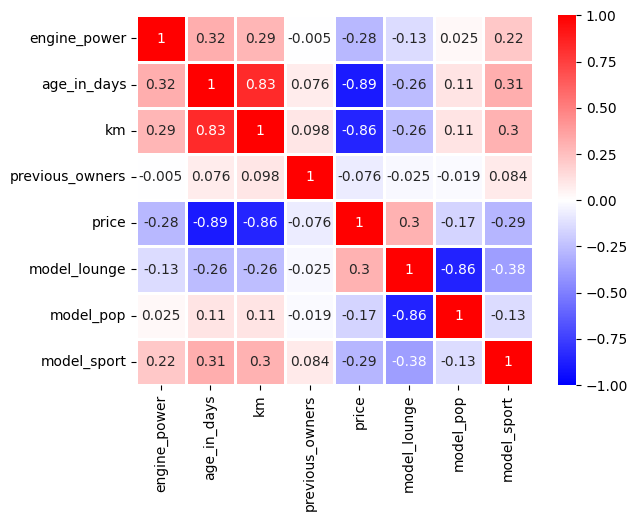

In [18]:
sb.heatmap(data_corr,vmax=1,vmin=-1,annot=True,linewidth=.8,cmap='bwr')

In [19]:
y = new_data1['price']
x = new_data1.drop(['price'],axis=1)

In [20]:
y.head()

0    8900
1    8800
2    4200
3    6000
4    5700
Name: price, dtype: int64

In [21]:
x.head()

,engine_power,age_in_days,km,previous_owners,model_lounge,model_pop,model_sport
0,51,882,25000,1,1,0,0
1,51,1186,32500,1,0,1,0
2,74,4658,142228,1,0,0,1
3,51,2739,160000,1,1,0,0
4,73,3074,106880,1,0,1,0


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
#Split data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [24]:
X_train.shape

(1030, 7)

In [25]:
X_test.shape

(508, 7)

In [26]:
from sklearn.linear_model import LinearRegression
# Traning model
rg = LinearRegression()
rg.fit(X_train,y_train)

LinearRegression()

In [27]:
y_predict = rg.predict(X_test)

In [28]:
y_predict

array([ 5867.6503378 ,  7133.70142341,  9866.35776216,  9723.28874535,
       10039.59101162,  9654.07582608,  9673.14563045, 10118.70728123,
        9903.85952664,  9351.55828437, 10434.34963575,  7732.26255693,
        7698.67240131,  6565.95240435,  9662.90103518, 10373.20344286,
        9599.94844451,  7699.34400418,  4941.33017994, 10455.2719478 ,
       10370.51555682, 10391.60424404,  7529.06622456,  9952.37340054,
        7006.13845729,  9000.1780961 ,  4798.36770637,  6953.10376491,
        7810.39767825,  9623.80497535,  7333.52158317,  5229.18705519,
        5398.21541073,  5157.65652129,  8948.63632836,  5666.62365159,
        9822.1231461 ,  8258.46551788,  6279.2040404 ,  8457.38443276,
        9773.86444066,  6767.04074749,  9182.99904787, 10210.05195479,
        8694.90545226, 10328.43369248,  9069.05761443,  8866.7826029 ,
        7058.39787506,  9073.33877162,  9412.68162121, 10293.69451263,
       10072.49011135,  6748.5794244 ,  9785.95841801,  9354.09969973,
      

In [29]:
from sklearn.metrics import r2_score,mean_squared_error

In [30]:
r2_score(y_predict,y_test)

0.8105441386802237

In [31]:
mean_squared_error(y_predict,y_test)

581887.727391353

In [32]:
result = pd.DataFrame(columns=['Actual_price','Predicted_price'])
result['Actual_price']=y_test
result['Predicted_price']=y_predict

In [33]:
result = result.reset_index()

In [34]:
result['ID']=result.index

In [35]:
result

,index,Actual_price,Predicted_price,ID
0,481,7900,5867.650338,0
1,76,7900,7133.701423,1
2,1502,9400,9866.357762,2
3,669,8500,9723.288745,3
4,1409,9700,10039.591012,4
...,...,...,...,...
503,291,10900,10032.665135,503
504,596,5699,6281.536277,504
505,1489,9500,9986.327508,505
506,1436,6990,8381.517020,506


[]

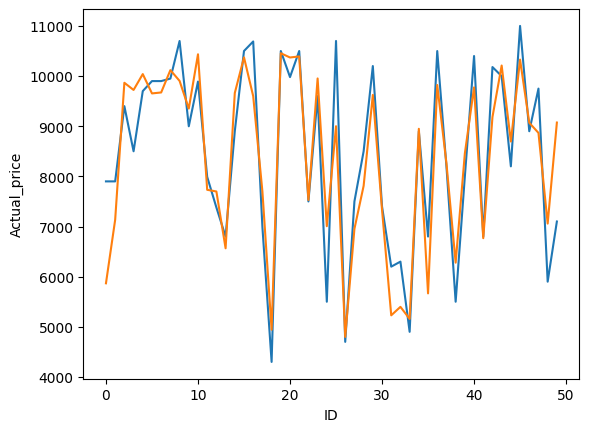

In [36]:
sb.lineplot(x='ID',y='Actual_price',data=result.head(50))#blue line is Orginal rice
sb.lineplot(x='ID',y='Predicted_price',data=result.head(50))#orange line is predicted
plt.plot()

In [37]:
# Testing
y_predict_sample = rg.predict([[51,882,70000,1,1,0,0]])

In [38]:
y_predict_sample

array([8995.26011495])